In [1]:
%load_ext nb_black
import IPython.display

IPython.display.set_matplotlib_formats("svg")

<IPython.core.display.Javascript object>

In [2]:
import estimate, sim
import matplotlib.pyplot as plt
import numpy as np
from estimate import posterior_decoding

def plot_single(ax, fits, truth=None):
    for fit in fits:
        x = np.arange(len(fit))
        ax.plot(x, fit, color="tab:blue")
        ax.plot(x, truth, "--", alpha=0.5, color="tab:grey")


<IPython.core.display.Javascript object>

In [3]:
def load_data(file):
    oo = np.loadtxt(file)
    return [oo[:, 1], oo[:, 0]]


pops = ["Britain", "Central", "Iberia", "Italy"]
raw_obs = {x: np.loadtxt("data/" + x + "_LCT.txt").astype(int) for x in pops}


<IPython.core.display.Javascript object>

### New data format

In [4]:
from common import Observation


obs = {
    pop: [
        Observation(t=len(ary) - i - 1, sample_size=oo[0], num_derived=oo[1], Ne=1e6)
        for i, oo in enumerate(ary)
        if oo[0] > 0
    ]
    for pop, ary in raw_obs.items()
}

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Generations before present')

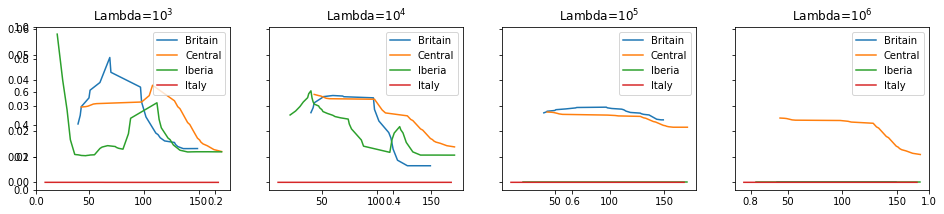

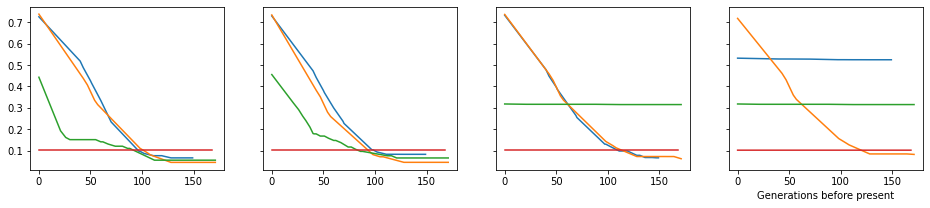

<IPython.core.display.Javascript object>

In [10]:
fig, axs = plt.subplots(ncols=4, figsize=(16, 3), sharey=True)
fig2, axs2 = plt.subplots(ncols=4, figsize=(16, 3), sharey=True)

for j, (ax, ax2, log10_lam) in enumerate(zip(axs, axs2, range(3, 7))):
    for pop in obs:
        data = obs[pop]
        res = estimate.estimate(data, lam=10 ** log10_lam, M=100)
        pd = posterior_decoding(data, res["s"])
        ax.plot(res["t"][:-1], res["s"], label=pop)
        ax2.plot(pd.t, pd.mean(), label=pop)

    ax.legend()
    ax.title.set_text(f"Lambda=$10^{log10_lam}$")

fig.add_subplot(111, frameon=False)
plt.xlabel("Generations before present")

In [ ]:
plot_res